# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/work/retailers.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

El promedio de las ventas de las compañias sin contar a la dominante (Walmart), fue de:  47907.2  millones de dolares


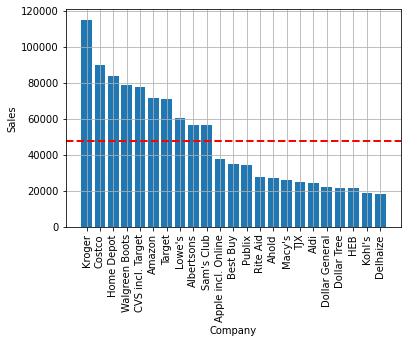

In [ ]:
#Ordenamos la lista de mayor a menor
df_sorted=df.sort_values('Sales',ascending=False)
#Partimos la lista eliminando el mayor vendedor
x_1 = df_sorted['Sales'][1:24].mean()
x_1r = x_1.round(1)
print('El promedio de las ventas de las compañias sin contar a la dominante (Walmart), fue de: ', x_1r,' millones de dolares')
x = df_sorted['Company'][1:24]
y = df_sorted['Sales'][1:24]
plt.bar(x,y)
plt.grid() 
plt.axhline(x_1, color ="r", linestyle = '--', linewidth = 2)
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()


### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

La mayoria de las compañías generó en promedio  71063.0  millones de dolares en ventas
La mayoria de las compañías generó  34980.0  millones de dolares en ventas
La mayoria de las compañías sin la dominante generó en promedio 47907.0  millones de dolares en ventas
La mayoria de las compañías sin la dominante generó  34980.0  millones de dolares en ventas


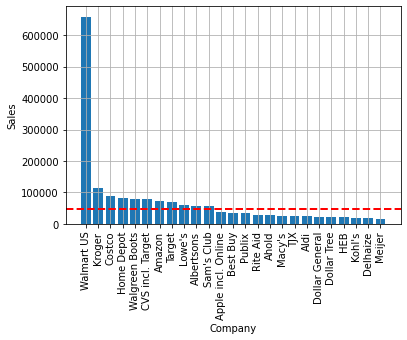

In [ ]:
#Promedio y mediana de las ventas
median = df['Sales'].median().round(0)
mean = df['Sales'].mean().round(0)
#Promedio de ventas sin la dominante
mean_1 = df_sorted['Sales'][1:24].mean().round(0)
median_1 = df_sorted['Sales'][1:24].median().round(0)
print('La mayoria de las compañías generó en promedio ',mean,' millones de dolares en ventas')
print('La mayoria de las compañías generó ',median,' millones de dolares en ventas')
print('La mayoria de las compañías sin la dominante generó en promedio',mean_1,' millones de dolares en ventas')
print('La mayoria de las compañías sin la dominante generó ',median_1,' millones de dolares en ventas')
x = df['Company']
y = df['Sales']
plt.bar(x,y)
plt.grid()
plt.axhline(mean_1, color ="r", linestyle = '--', linewidth = 2)
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()


Trabajar con el promedio falsearía la información pues tiene en cuenta las ventas de Walmart que son muy superiores, por eso se trabaja con la media o en su defecto el promedio eliminando la dominante.

La mayoría de las compañías sin la dominante generó  34980.0  millones de dólares en ventas.

La mayoría de las compañías sin la dominante generó en promedio 47907.0  millones de dólares en ventas

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

La mayoria de las compañías tiene  1828.0  tiendas


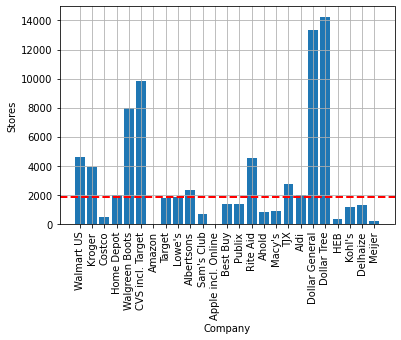

In [ ]:
median = df['Stores'].median().round(0)
mean = df['Stores'].mean().round(0)
#print(mean)
print('La mayoria de las compañías tiene ',median,' tiendas')
company_sorted =df.sort_values('Stores',ascending=False)
x = df['Company']
y = df['Stores']
plt.bar(x,y)
plt.grid()
plt.axhline(median, color ="r", linestyle = '--', linewidth = 2)
plt.xlabel('Company')
plt.ylabel('Stores')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

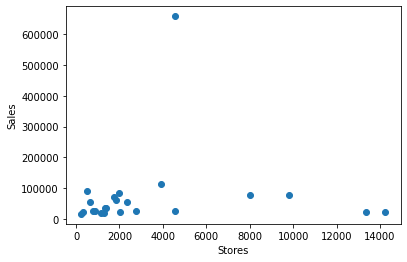

Text(0, 0.5, 'Sales')

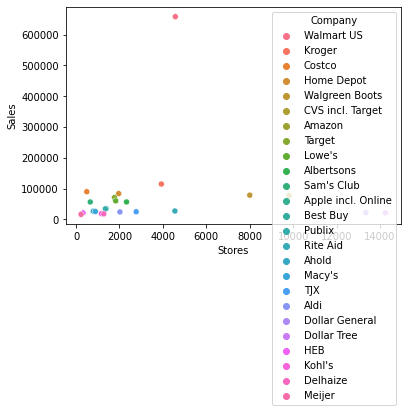

In [ ]:
x = df['Stores']
y = df['Sales']
plt.scatter(x, y)
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.show()

sns.scatterplot(data=df,x='Stores',y='Sales',hue='Company')
plt.xlabel('Stores')
plt.ylabel('Sales')

Contar con una gran cantidad de tiendas no tiene una relación directa o proporcional con las ventas, se observa que la mayoría de compañías tienen un tope de 100.000 millones en ventas con una cantidad entre 0 y 2000 tienda, hay algunas compañías que cuentan con una cantidad mayor a 2000 tiendas sin tener una cantidad mayor de ventas a la competencia. Por otra parte la compañía que mas ventas presenta (Walmart) esta lejos en numero de tiendas que las compañías con mas tiendas. 

Por ende se concluye que tener una gran cantidad de tiendas no necesariamente tendrá grandes ventas.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
df_ventas=df['Sales']
max_ventas = df_ventas.max()
min_ventas = df_ventas.min()
rango = max_ventas-min_ventas
print('El rango entre las ventas es: ', rango, ' millones de dolares')

El rango entre las ventas es:  641527  millones de dolares


### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

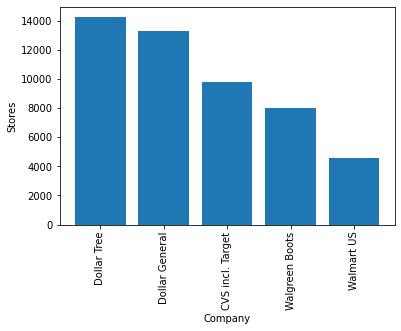

In [ ]:
df_tiendas=df.sort_values('Stores',ascending=False)[0:5]
df_tiendas
x = df_tiendas['Company']
y = df_tiendas['Stores']
plt.bar(x,y)
plt.xlabel('Company')
plt.ylabel('Stores')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

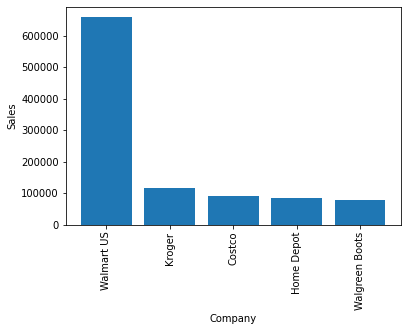

In [ ]:
df_ventas=df.sort_values('Sales',ascending=False)[0:5]
x = df_ventas['Company']
y = df_ventas['Sales']
plt.bar(x,y)
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()


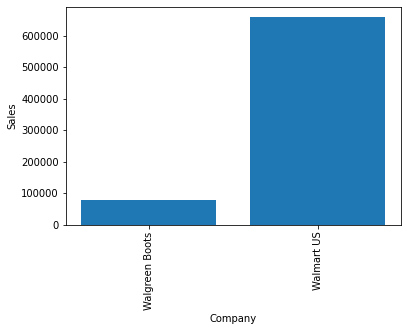

In [ ]:
comun = pd.merge(left=df_tiendas, right=df_ventas)
comun
x = comun['Company']
y = comun['Sales']
plt.bar(x,y)
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

De las compañías que mas tiendas tienen, solo 2 son las que mas venden, las cuales son Walmart y Walgreen Boots, donde Walgreen Boots tiene mas tiendas que Walmart pero sus ventas son menores. Se confirma que tener muchas tiendas no necesariamente desencadena en grandes ventas

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

<function matplotlib.pyplot.show(close=None, block=None)>

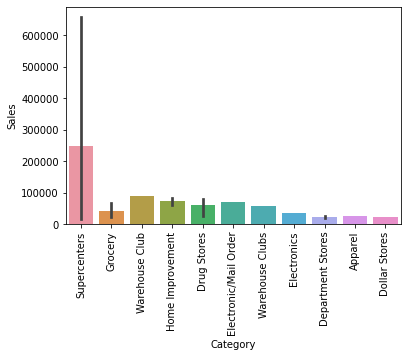

In [ ]:
sns.barplot(x='Category', y='Sales',data=df_sorted)
plt.xticks(rotation='vertical')
plt.show

La categoría que mas ventas genera son los supercenters, lo cual es esperado teniendo en cuenta la cantidad de ventas tan grande que presenta Walmart, por otra parte en segundo lugar encontramos los warehouse club. Si se pensara en abrir un negocio tal vez se pueda ver tentado por un supercenter teniendo en cuenta sus ventas, sin embargo al analizar que su gran líder y competidor es Walmart, tal vez sea mas conveniente una tienda Warehouse que tiene ventas importantes en el sector sin necesidad de competir con un gigante que domina el mercado.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

<function matplotlib.pyplot.show(close=None, block=None)>

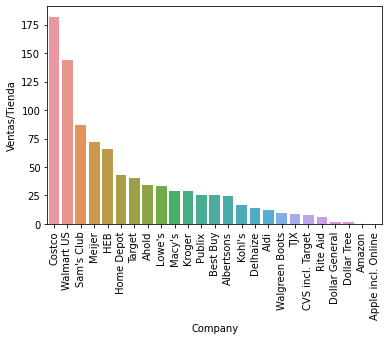

In [ ]:
#Creamos nueva columna en el data frame
#Llenamos la columna con el nuevo dato, en este caso ventas por tienda
df['Ventas/Tienda'] = df['Sales'] / df['Stores']
df_v_x_t = df.sort_values('Ventas/Tienda',ascending=False)
df_v_x_t
sns.barplot(x='Company', y='Ventas/Tienda',data=df_v_x_t)
plt.xticks(rotation='vertical')
plt.show

Se observa que la compañía que mas ventas genera por tienda es Costco, incluso por encima de Walmart, esto quiere decir que sus tiendas generan más valor en ventas. Además, se muestra el orden de las compañías sus ventas en función de cantidad de tiendas. 

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [ ]:
Online = df[df.isnull().any(True)]
Online
tot_v = Online['Sales'].sum()
print('El total en ventas totalmente online es: ', tot_v,' Millones de dolares')

El total en ventas totalmente online es:  109351  Millones de dolares


<function matplotlib.pyplot.show(close=None, block=None)>

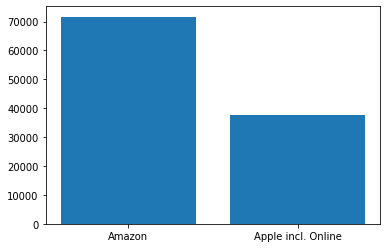

In [ ]:
plt.bar(Online.Company,Online.Sales)
plt.show

In [ ]:
#Deja los datos no nulos, los otros los elimina
tiendas_fisicas = df.dropna()
tiendas_fisicas

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Ventas/Tienda
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery,24.432072
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305


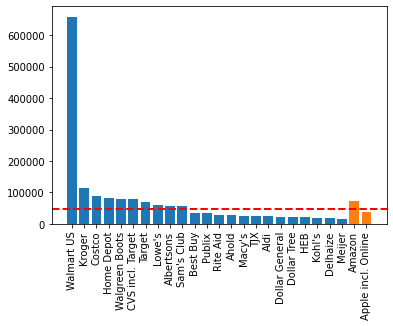

In [ ]:
fig, ax = plt.subplots()
ax.bar(tiendas_fisicas.Company,tiendas_fisicas.Sales)
ax.bar(Online.Company,Online.Sales)
plt.axhline(x_1, color ="r", linestyle = '--', linewidth = 2)
plt.xticks(rotation=90)
plt.show()

Se observa que las ventas de las compañías online están en un rango aceptable, al comparar con la media de ventas de compañías con tienda física, por ejemplo Amazon netamente online y sus ventas están por encima del promedio de compañías, por otra parte Apple vende un poco menos del promedio de ventas de las otras compañías, sin embargo esta  bastante cerca de ese punto medio.

## III. Tus propias preguntas

### 10. Ventas vs la tasa de crecimiento de tiendas?

In [ ]:
df_crec = df.sort_values('Store Count Growth',ascending=False)[0:10]
df_crec

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Ventas/Tienda
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores,1.665468
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery,12.074221
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,29.277840
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores,1.506246
17,TJX,25012,2770.0,9.369545,0.078241,Apparel,9.029603
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055
13,Publix,34408,1351.0,25.997733,0.042438,Grocery,25.468542


<function matplotlib.pyplot.show(close=None, block=None)>

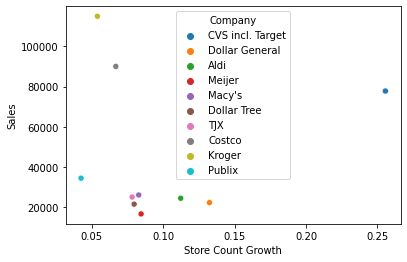

In [ ]:
sns.scatterplot(data=df_crec,x='Store Count Growth',y='Sales',hue='Company')
plt.xlabel('Store Count Growth')
plt.ylabel('Sales')
plt.show

Se observa que la tasa de crecimiento en tiendas no tiene una relación directa con las ventas por compañía, puesto que algunas compañías como CVS incl. Target tiene la tasa de crecimiento más alta y sus ventas son altas pero no son las mayores, al comparar con Kroger que tiene una tasa de crecimiento bajo pero grandes ventas. Pero por ejemplo, Dollar general, Aldi, Meijer, que están en los primeros puestos con tasas altas de crecimiento en tiendas, esto no se refleja en sus ventas, por lo tanto nuevamente se confirma que abrir muchas tiendas no necesariamente quiere decir que se tendrán muchas ventas

### 11. Tasa de crecimiento de tiendas en orden

In [ ]:
df_crec1 = df.sort_values('Store Count Growth',ascending=False)
df_crec1

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Ventas/Tienda
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores,1.665468
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery,12.074221
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,29.277840
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores,1.506246
17,TJX,25012,2770.0,9.369545,0.078241,Apparel,9.029603
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055
13,Publix,34408,1351.0,25.997733,0.042438,Grocery,25.468542


<function matplotlib.pyplot.show(close=None, block=None)>

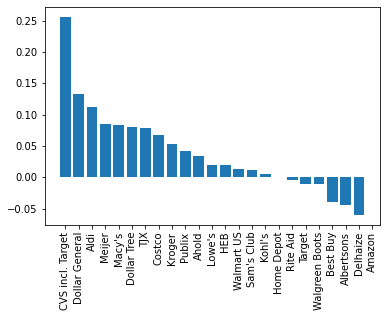

In [ ]:
plt.bar(df_crec1['Company'],df_crec1['Store Count Growth'])
plt.xticks(rotation=90)
plt.show

Se observa cuales son las compañías que mas están abriendo tiendas, y también se puede ver cuales están cerrando (las que tienen una tasa negativa). De ahí podríamos inferir cuales a futuro pueden tener más puntos y esperan crecer sus ventas.

### 12. Top 5 de las tiendas que más venden en promedio por tienda fisica

In [ ]:
df_crec2 = df.sort_values('Sales/Avg. Store',ascending=False)[0:5]
df_crec2

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Ventas/Tienda
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840
21,HEB,21384,323.0,66.825000,0.018927,Grocery,66.204334
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597


<function matplotlib.pyplot.show(close=None, block=None)>

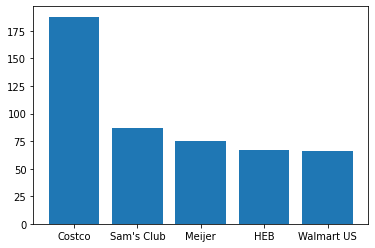

In [ ]:
plt.bar(df_crec2['Company'],df_crec2['Sales/Avg. Store'])
plt.show

Se observa que Costco, es la tienda que en promedio más vende por tienda física, seguida por Sams´s, Meijer, Heb, y Walmart. Se podría entender como una tienda más eficiente al tener en cuenta que sus tiendas son las que más venden en promedio y coincide con lo encontrado anteriormente.